In [6]:
import pandas as pd

import seaborn as sns

sns.set_context("talk")
import matplotlib.pyplot as plt
import statsmodels

import statsmodels.formula.api as smf
import numpy as np
plt.style.use("ggplot")
data=pd.read_csv('clean_data/final_dataset.csv')
data[['income_census','pop_census']]=np.log(data[['income_census','pop_census']])

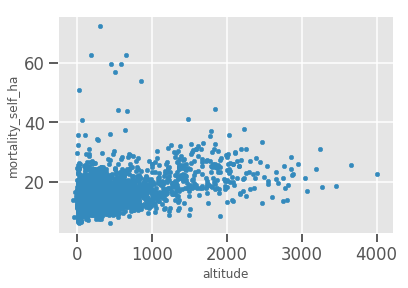

In [5]:
data.plot.scatter('altitude','mortality_self_ha')

In [8]:
smf.ols('mortality_self_ha~income_census',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_self_ha   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           4.24e-35
Time:                        21:56:24   Log-Likelihood:                -9405.3
No. Observations:                3126   AIC:                         1.881e+04
Df Residuals:                    3124   BIC:                         1.883e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        65.6271      3.949     16.617      0.000      57.883      73.371
income_census    -4.9436      0.395    -12.515      0.000      -5.718      -4.169
==============================================================================
Omnibus:                     2035.897   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47712.815
Skew:                           2.716   Prob(JB):                         0.00
Kurtosis:                      21.352   Cond. No.                         455.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
res=smf.ols('mortality_self_ha~altitude+nhwrate+income_census+nativerate',data=data).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_self_ha   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     523.4
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:00:24   Log-Likelihood:                -8679.5
No. Observations:                3126   AIC:                         1.737e+04
Df Residuals:                    3121   BIC:                         1.740e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        59.6711      3.198     18.661      0.000      53.402      65.941
altitude          0.0033      0.000     22.888      0.000       0.003       0.004
nhwrate           4.5830      0.379     12.091      0.000       3.840       5.326
income_census    -4.9045      0.324    -15.116      0.000      -5.541      -4.268
nativerate       33.5947      1.041     32.260      0.000      31.553      35.637
==============================================================================
Omnibus:                     1188.809   Durbin-Watson:                   1.471
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15740.885
Skew:                           1.429   Prob(JB):                         0.00
Kurtosis:                      13.615   Cond. No.                     3.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
data['residual_mor']=res.resid

In [28]:
#Even after controlling for altitude, state_mormon has a significant coefficient.
smf.ols('residual_mor~mormon',data=data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           residual_mor   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     33.16
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           9.31e-09
Time:                        22:02:10   Log-Likelihood:                -8663.0
No. Observations:                3126   AIC:                         1.733e+04
Df Residuals:                    3124   BIC:                         1.734e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1014      0.071     -1.421      0.155      -0.241       0.039
mormon         0.0047      0.001      5.758      0.000       0.003       0.006
==============================================================================
Omnibus:                     1149.713   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16161.327
Skew:                           1.350   Prob(JB):                         0.00
Kurtosis:                      13.807   Cond. No.                         91.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

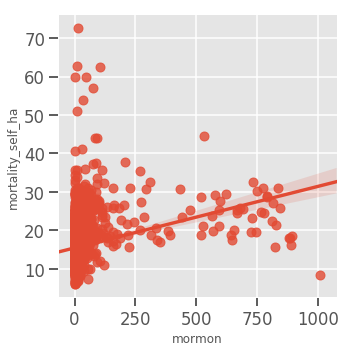

In [33]:
sns.lmplot("mormon","mortality_self_ha", data,robust=True)

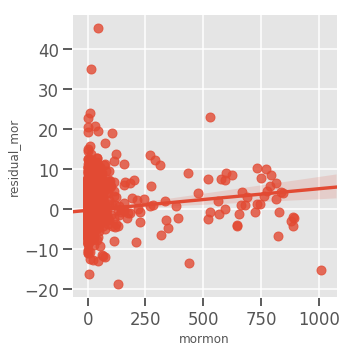

In [32]:
sns.lmplot("mormon","residual_mor", data,robust=True)

In [14]:
smf.ols(
    "mortality_self_ha~altitude+nhwrate+mormon+state_mormon+income_census+nativerate",
    data=data,
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      mortality_self_ha   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     366.1
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:57:34   Log-Likelihood:                -8648.5
No. Observations:                3126   AIC:                         1.731e+04
Df Residuals:                    3119   BIC:                         1.735e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        58.3918      3.177     18.380      0.000      52.163      64.621
altitude          0.0027      0.000     17.032      0.000       0.002       0.003
nhwrate           4.5637      0.375     12.156      0.000       3.828       5.300
mormon           -0.0008      0.002     -0.450      0.653      -0.004       0.003
state_mormon      9.2362      2.032      4.546      0.000       5.252      13.220
income_census    -4.7704      0.322    -14.795      0.000      -5.403      -4.138
nativerate       33.6435      1.032     32.616      0.000      31.621      35.666
==============================================================================
Omnibus:                     1174.317   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16019.003
Skew:                           1.397   Prob(JB):                         0.00
Kurtosis:                      13.732   Cond. No.                     3.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""